# EDA for a randomly selected user

## Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load random user data

In [2]:
path = "" # input path to a parquet

df = pd.read_parquet(path)

In [3]:
df.head()

,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,EKG,light,EDA,HR,trigger,valence_rating,arousal_rating,start_timestamp,duration,norm_pos_x_fixation,norm_pos_y_fixation,dispersion,confidence_fixation,end_timestamp
index,,,,,,,,,,,,,,,,,,,,
14863,111.387001,0,0.641936,0.589208,0.373247,27.114815,0.529244,0.239765,0.307012,0.471375,42312.0,NaN,NaN,111.339027,0.112034,0.401928,0.447667,1.243618,0.760623,111.451061
14864,111.387054,1,0.847541,0.505507,0.473328,22.554743,0.529244,0.239765,0.307012,0.471375,42312.0,NaN,NaN,111.339027,0.112034,0.401928,0.447667,1.243618,0.760623,111.451061
14865,111.387938,0,1.000000,0.501223,0.482902,18.700886,0.529244,0.239765,0.307012,0.471375,42312.0,NaN,NaN,111.339027,0.112034,0.401928,0.447667,1.243618,0.760623,111.451061
14866,111.392644,1,1.000000,0.500394,0.435451,18.717367,0.529244,0.239765,0.307012,0.471375,42312.0,NaN,NaN,111.339027,0.112034,0.401928,0.447667,1.243618,0.760623,111.451061
14867,111.395094,0,0.647059,0.589067,0.374159,27.293261,0.529244,0.239765,0.307012,0.471375,42312.0,NaN,NaN,111.339027,0.112034,0.401928,0.447667,1.243618,0.760623,111.451061


## Drop rows where valence or arousal is nan

In [4]:
# Drop rows where valence or arousal or trigger are NaN

df = df.dropna(subset=['valence_rating', 'arousal_rating', 'trigger'])

In [5]:
valence_per_trigger = df.groupby('trigger').mean()["valence_rating"].to_frame().reset_index()

arousal_per_trigger = df.groupby('trigger').mean()["arousal_rating"].to_frame().reset_index()

### Valence and Arousal rating distribution

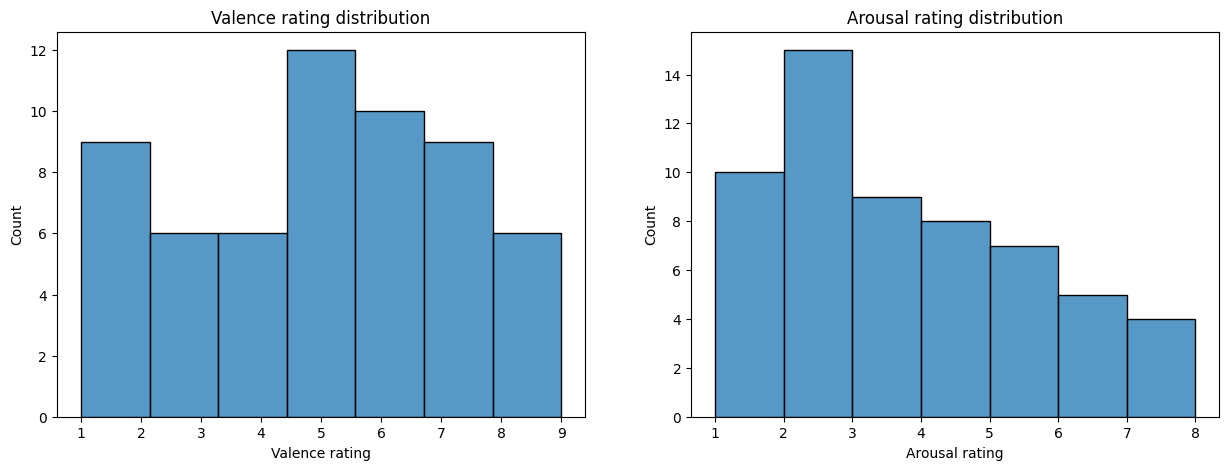

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(valence_per_trigger["valence_rating"], ax=axs[0])
axs[0].set_title("Valence rating distribution")
axs[0].set_xlabel("Valence rating")

sns.histplot(arousal_per_trigger["arousal_rating"], ax=axs[1])
axs[1].set_title("Arousal rating distribution")
axs[1].set_xlabel("Arousal rating")

plt.show()

### Bitalino in time

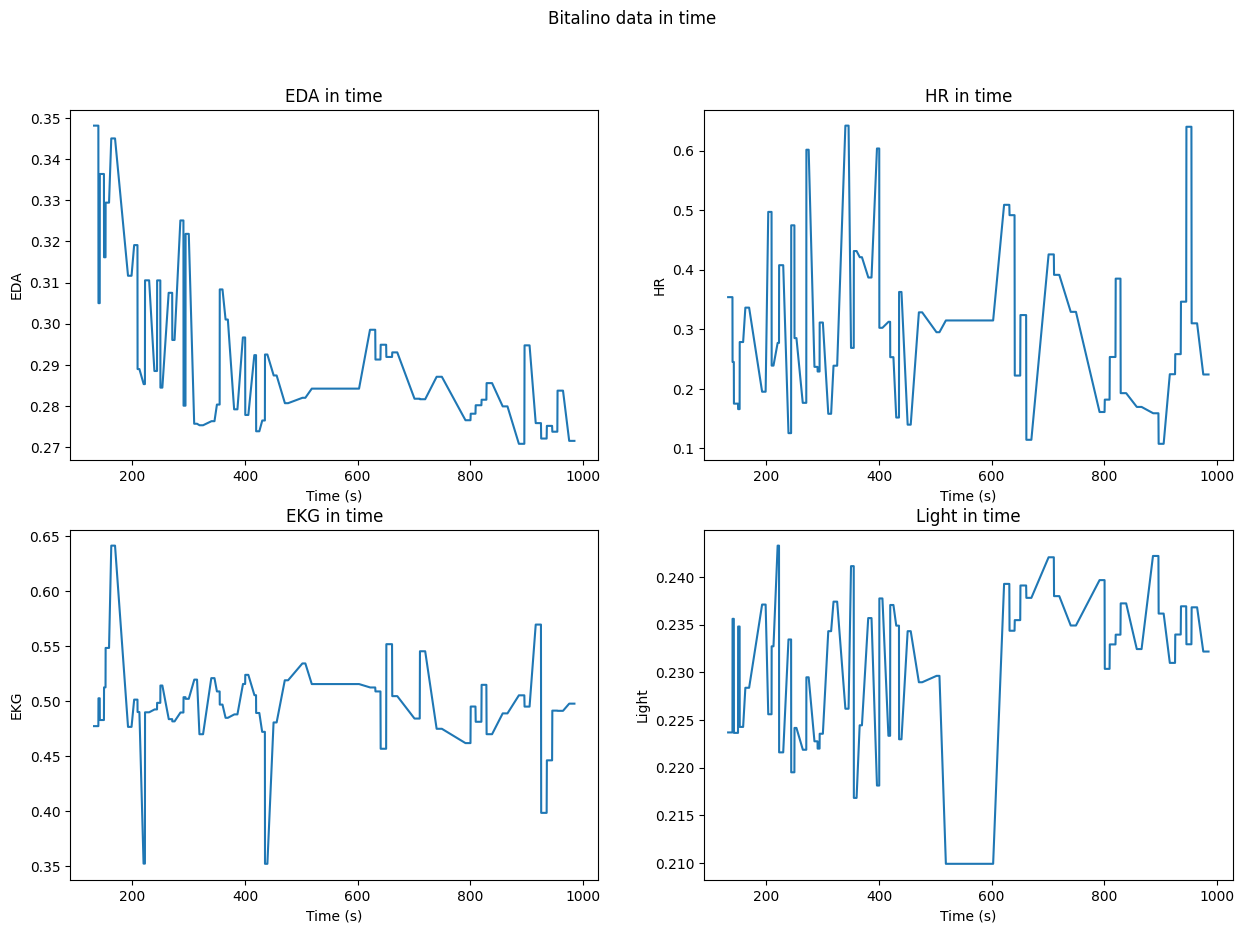

In [8]:
df_sorted = df.sort_values(by=['pupil_timestamp'])

# Get row every 100 rows in pupil_timestamp
df_sorted = df_sorted.iloc[::100, :]

# Plot EDA in time
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle("Bitalino data in time")

sns.lineplot(data=df_sorted, x="pupil_timestamp", y="EDA", ax=axs[0, 0])
axs[0, 0].set_title("EDA in time")
axs[0, 0].set_xlabel("Time (s)")
axs[0, 0].set_ylabel("EDA")

sns.lineplot(data=df_sorted, x="pupil_timestamp", y="HR", ax=axs[0, 1])
axs[0, 1].set_title("HR in time")
axs[0, 1].set_xlabel("Time (s)")
axs[0, 1].set_ylabel("HR")

sns.lineplot(data=df_sorted, x="pupil_timestamp", y="EKG", ax=axs[1, 0])
axs[1, 0].set_title("EKG in time")
axs[1, 0].set_xlabel("Time (s)")
axs[1, 0].set_ylabel("EKG")

sns.lineplot(data=df_sorted, x="pupil_timestamp", y="light", ax=axs[1, 1])
axs[1, 1].set_title("Light in time")
axs[1, 1].set_xlabel("Time (s)")
axs[1, 1].set_ylabel("Light")


plt.show()

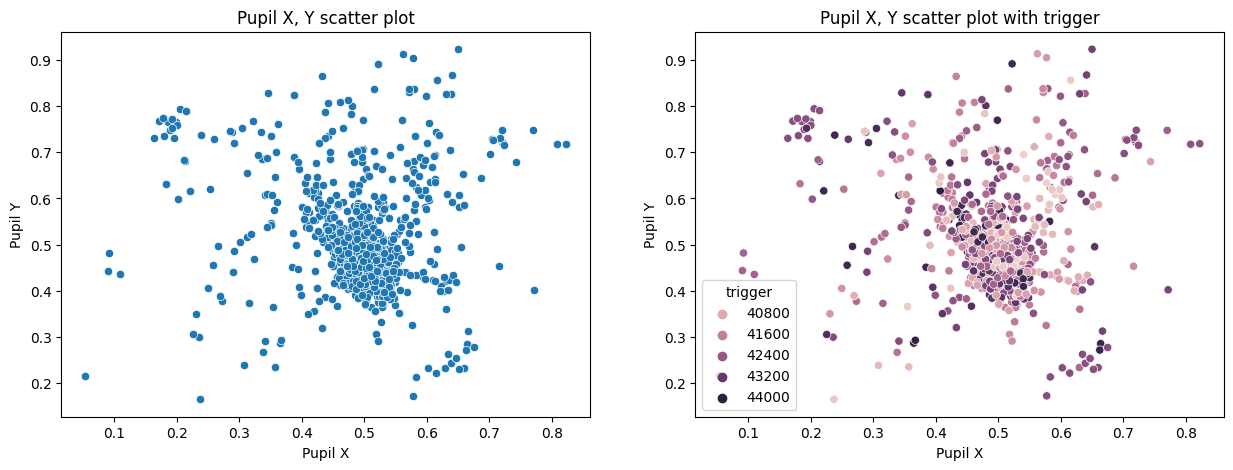

In [9]:
# X, Y of pupil scatter plot

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

df_fixated = df[df["norm_pos_y_fixation"] > 0]
sns.scatterplot(data=df_fixated[::100], x="norm_pos_x_fixation", y="norm_pos_y_fixation", ax=axs[0])
axs[0].set_title("Pupil X, Y scatter plot")
axs[0].set_xlabel("Pupil X")
axs[0].set_ylabel("Pupil Y")

sns.scatterplot(data=df_fixated[::100], x="norm_pos_x_fixation", y="norm_pos_y_fixation", hue="trigger", ax=axs[1])
axs[1].set_title("Pupil X, Y scatter plot with trigger")
axs[1].set_xlabel("Pupil X")
axs[1].set_ylabel("Pupil Y")    

plt.show()

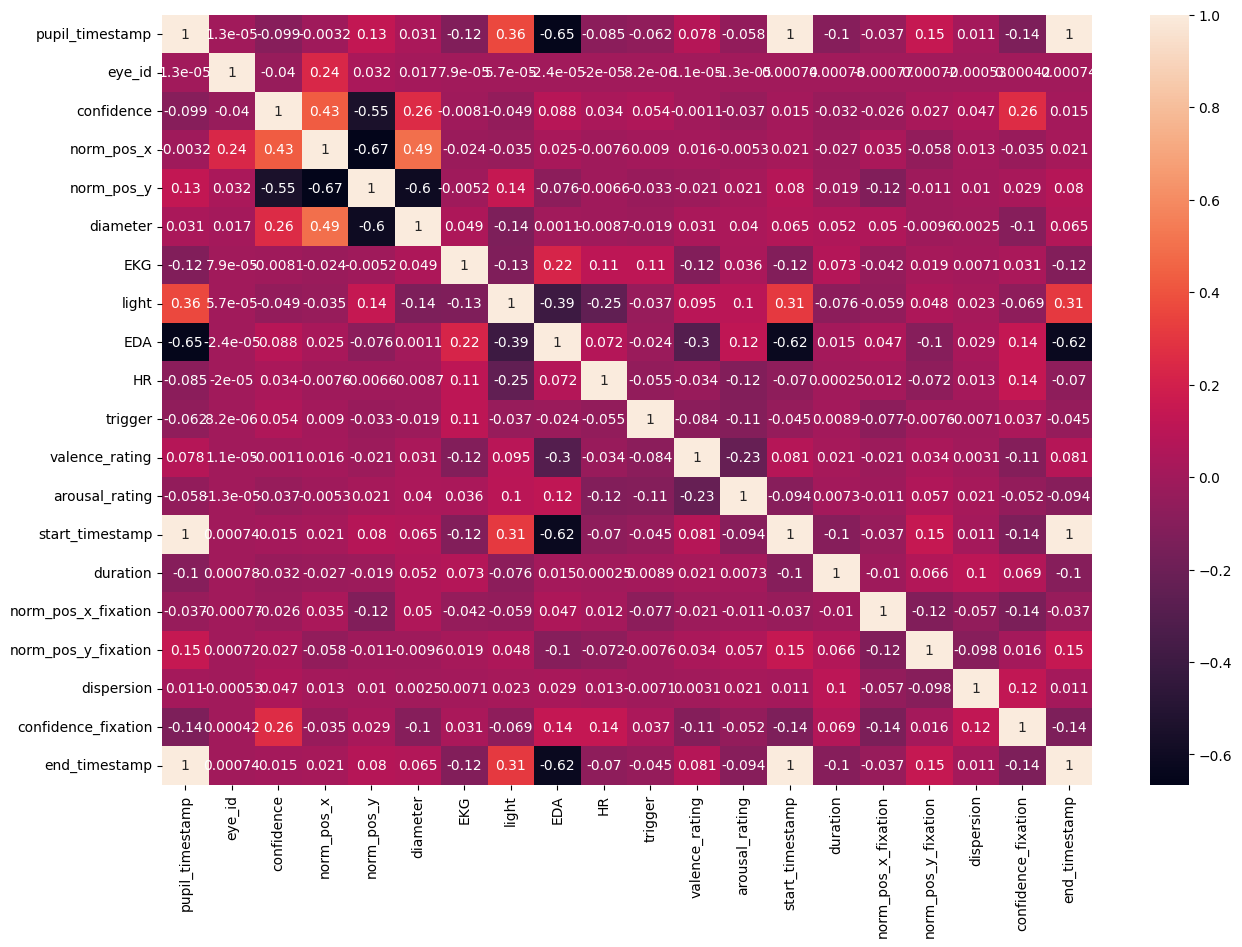

In [10]:
# Print correlation matrix

corr = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

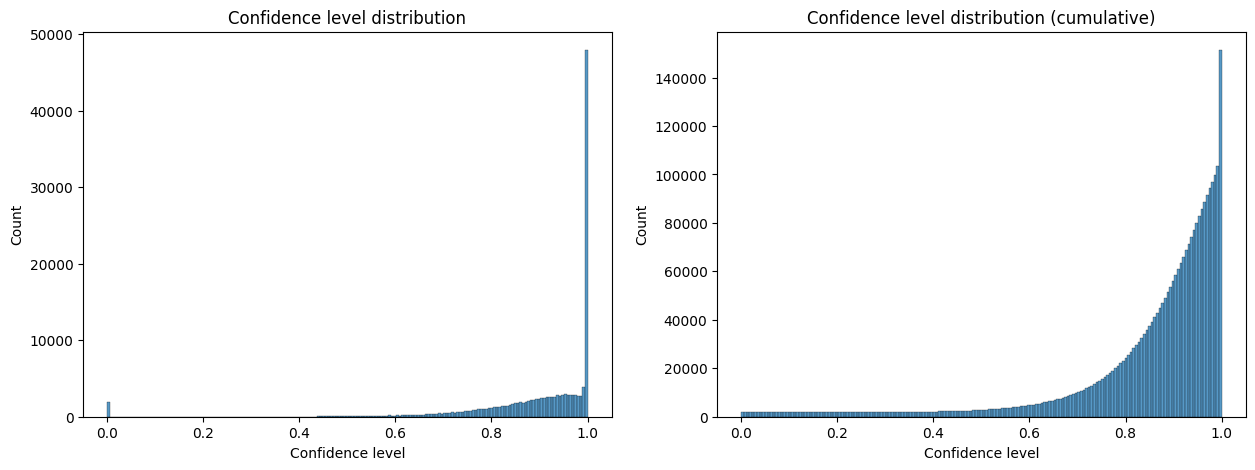

In [11]:
# Confidence level distribution

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df["confidence"], ax=axs[0])
axs[0].set_title("Confidence level distribution")
axs[0].set_xlabel("Confidence level")

sns.histplot(df["confidence"], ax=axs[1], cumulative=True)
axs[1].set_title("Confidence level distribution (cumulative)")
axs[1].set_xlabel("Confidence level")

plt.show()

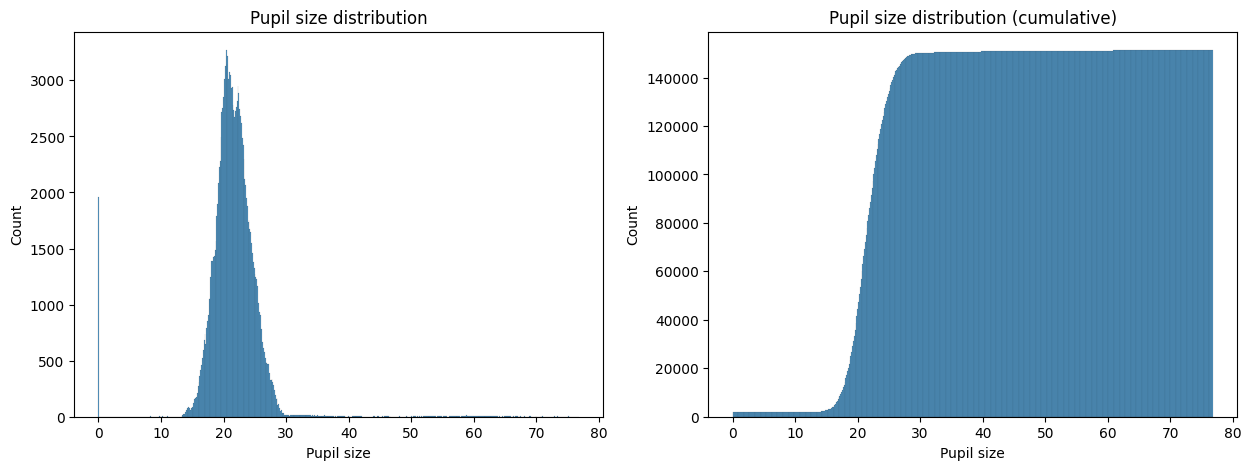

In [12]:
# Pupil size distribution

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df["diameter"], ax=axs[0])
axs[0].set_title("Pupil size distribution")
axs[0].set_xlabel("Pupil size")

sns.histplot(df["diameter"], ax=axs[1], cumulative=True)
axs[1].set_title("Pupil size distribution (cumulative)")
axs[1].set_xlabel("Pupil size")

plt.show()

## Scatter plots of Arousal vs Bitalino data

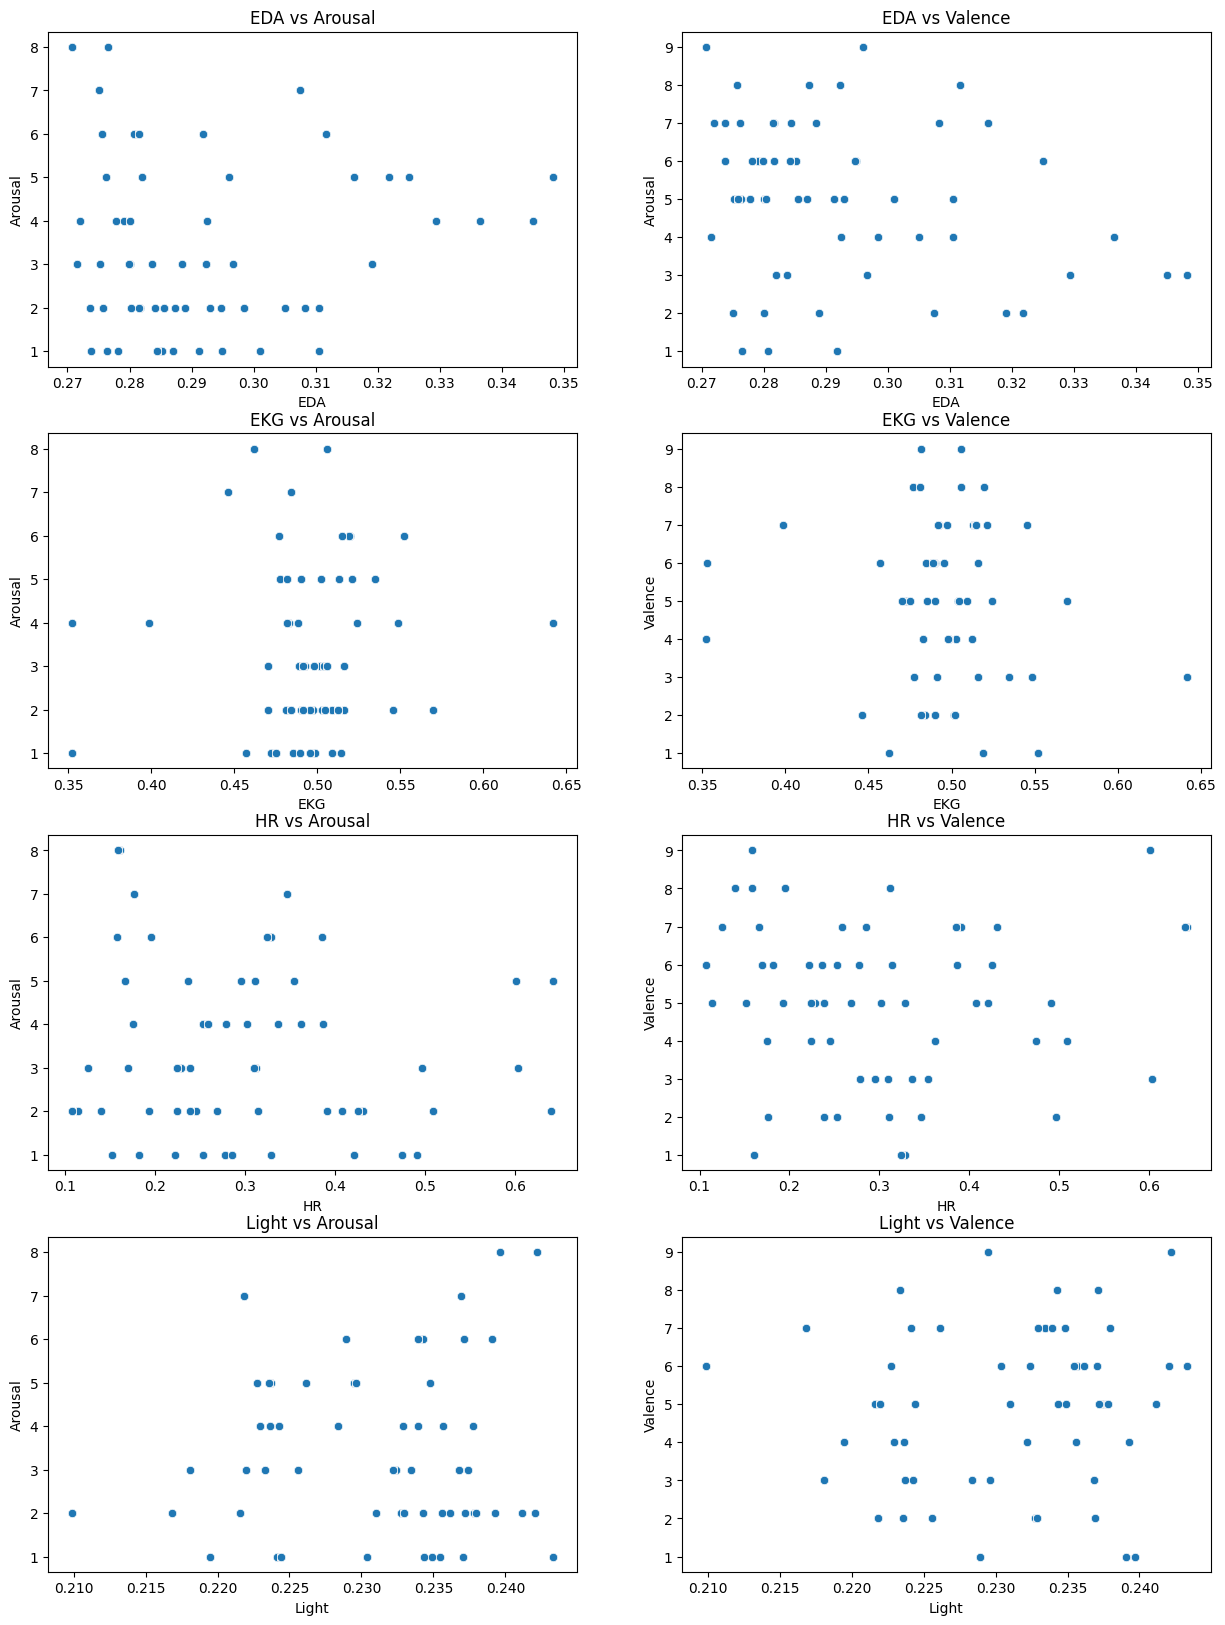

In [18]:
# Arousal vs EDA, EKG, HR, light

fig, axs = plt.subplots(4, 2, figsize=(15, 20))

sns.scatterplot(data=df, x="EDA", y="arousal_rating", ax=axs[0, 0])
axs[0, 0].set_title("EDA vs Arousal")
axs[0, 0].set_xlabel("EDA")
axs[0, 0].set_ylabel("Arousal")

sns.scatterplot(data=df, x="EDA", y="valence_rating", ax=axs[0, 1])
axs[0, 1].set_title("EDA vs Valence")
axs[0, 1].set_xlabel("EDA")
axs[0, 1].set_ylabel("Arousal")

sns.scatterplot(data=df, x="EKG", y="arousal_rating", ax=axs[1, 0])
axs[1, 0].set_title("EKG vs Arousal")
axs[1, 0].set_xlabel("EKG")
axs[1, 0].set_ylabel("Arousal")

sns.scatterplot(data=df, x="EKG", y="valence_rating", ax=axs[1, 1])
axs[1, 1].set_title("EKG vs Valence")
axs[1, 1].set_xlabel("EKG")
axs[1, 1].set_ylabel("Valence")

sns.scatterplot(data=df, x="HR", y="arousal_rating", ax=axs[2, 0])
axs[2, 0].set_title("HR vs Arousal")
axs[2, 0].set_xlabel("HR")
axs[2, 0].set_ylabel("Arousal")

sns.scatterplot(data=df, x="HR", y="valence_rating", ax=axs[2, 1])
axs[2, 1].set_title("HR vs Valence")
axs[2, 1].set_xlabel("HR")
axs[2, 1].set_ylabel("Valence")

sns.scatterplot(data=df, x="light", y="arousal_rating", ax=axs[3, 0])
axs[3, 0].set_title("Light vs Arousal")
axs[3, 0].set_xlabel("Light")
axs[3, 0].set_ylabel("Arousal")

sns.scatterplot(data=df, x="light", y="valence_rating", ax=axs[3, 1])
axs[3, 1].set_title("Light vs Valence")
axs[3, 1].set_xlabel("Light")
axs[3, 1].set_ylabel("Valence")

plt.show()


In [19]:
df.shape

(151363, 20)